In [96]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [97]:
file_path = r'C:\Users\afzal\Downloads\IMDb Movies India.csv'  
movie_data = pd.read_csv(file_path, encoding='ISO-8859-1') 
movie_data.shape

(15509, 10)

In [98]:
movie_data.isnull().sum()
movie_data.info()
movie_data.duplicated().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


np.int64(6)

In [99]:
print(movie_data.info())

movie_data.dropna(inplace=True)
movie_data.drop_duplicates(inplace=True)

movie_data['Year'] = movie_data['Year'].astype(str).str.replace(r'[()]', '', regex=True)
movie_data['Year'] = pd.to_numeric(movie_data['Year'], errors='coerce') 

movie_data['Duration'] = movie_data['Duration'].astype(str).str.replace('min', '', regex=False)  
movie_data['Duration'] = pd.to_numeric(movie_data['Duration'], errors='coerce') 

movie_data['Genre'] = movie_data['Genre'].astype(str).str.split(',')
movie_data = movie_data.explode('Genre')  
mode_genre = movie_data['Genre'].mode()[0]  
movie_data['Genre'] = movie_data['Genre'].replace('', mode_genre) 

movie_data['Votes'] = movie_data['Votes'].astype(str).str.replace(',', '', regex=False)  
movie_data['Votes'] = pd.to_numeric(movie_data['Votes'], errors='coerce')  


print(movie_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB
None
<class 'pandas.core.frame.DataFrame'>
Index: 11979 entries, 1 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      11979 non-null  object 
 1   Year      11979 non-null  int64  
 2   Duration  11979 non-null  int64  
 3   Genre     11979 non-null  object 
 4   Rating    11979 non-nul

In [100]:
movie_data.drop('Name', axis=1, inplace=True)

movie_data['Genre_mean_rating'] = movie_data.groupby('Genre')['Rating'].transform('mean')
movie_data['Director_encoded'] = movie_data.groupby('Director')['Rating'].transform('mean')
movie_data['Actor1_encoded'] = movie_data.groupby('Actor 1')['Rating'].transform('mean')
movie_data['Actor2_encoded'] = movie_data.groupby('Actor 2')['Rating'].transform('mean')
movie_data['Actor3_encoded'] = movie_data.groupby('Actor 3')['Rating'].transform('mean')

X = movie_data[['Year', 'Votes', 'Duration', 'Genre_mean_rating', 'Director_encoded', 'Actor1_encoded', 'Actor2_encoded', 'Actor3_encoded']]
y = movie_data['Rating']


In [101]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('R^2 Score:', r2_score(y_test, y_pred))


Mean Squared Error: 0.4463977880886111
Mean Absolute Error: 0.4921055068501123
R^2 Score: 0.7641906900948997


In [102]:
test_data = {'Year': [2019], 'Votes': [36], 'Duration': [111], 
             'Genre_mean_rating': [5.8], 'Director_encoded': [4.5],
             'Actor1_encoded': [5.3], 'Actor2_encoded': [4.5],
             'Actor3_encoded': [4.5]}             
trial = pd.DataFrame(test_data)

rating_predicted = model.predict(trial)

formatted_rating = f"{rating_predicted[0]:.2f}" 


print("\n Movie Rating Prediction ")  
print("-" * 30)  
print(f"According to the provided details, we estimate the movie's rating to be: **{formatted_rating}**")  
print("-" * 30)  

print("Input Data Used for Prediction:")  
print(trial) 



 Movie Rating Prediction 
------------------------------
According to the provided details, we estimate the movie's rating to be: **4.21**
------------------------------
Input Data Used for Prediction:
   Year  Votes  Duration  Genre_mean_rating  Director_encoded  Actor1_encoded  \
0  2019     36       111                5.8               4.5             5.3   

   Actor2_encoded  Actor3_encoded  
0             4.5             4.5  


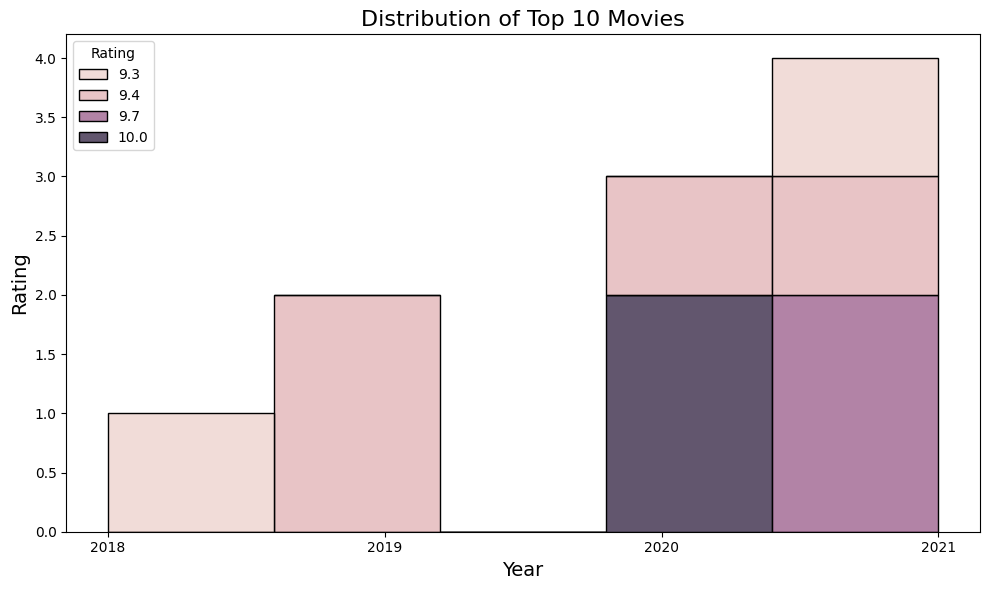

In [103]:
top_movies = movie_data.nlargest(10, 'Rating')
plt.figure(figsize=(10, 6))
sns.histplot(data=top_movies, x="Year", hue="Rating", multiple="stack")
plt.title('Distribution of Top 10 Movies', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Rating', fontsize=14)
plt.xticks(ticks=np.arange(top_movies['Year'].min(), top_movies['Year'].max() + 1, 1)) 
plt.tight_layout()
plt.show()


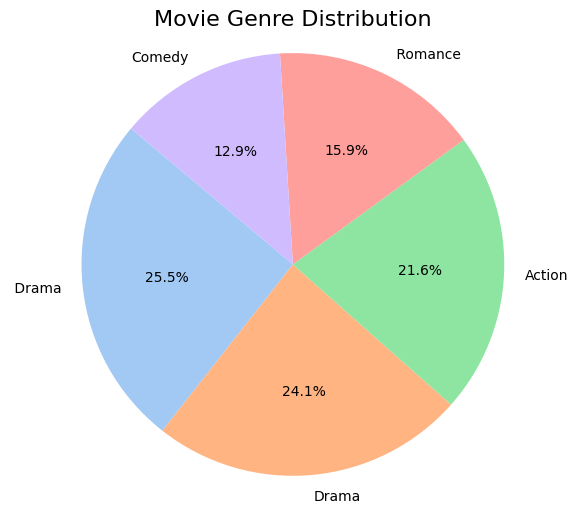

In [104]:
genre_counts = movie_data['Genre'].value_counts().reset_index()
genre_counts.columns = ['Genre', 'Count']
top_n_genres = genre_counts.head(5)

plt.figure(figsize=(6, 6))
plt.pie(top_n_genres['Count'], labels=top_n_genres['Genre'], autopct="%1.1f%%", startangle=140, colors=sns.color_palette('pastel'))
plt.title('Movie Genre Distribution', fontsize=16)
plt.axis('equal')
plt.show()


C:\Users\afzal\AppData\Local\Temp\ipykernel_28724\1861126353.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_directors, x='Rating', y='Director', palette='viridis')


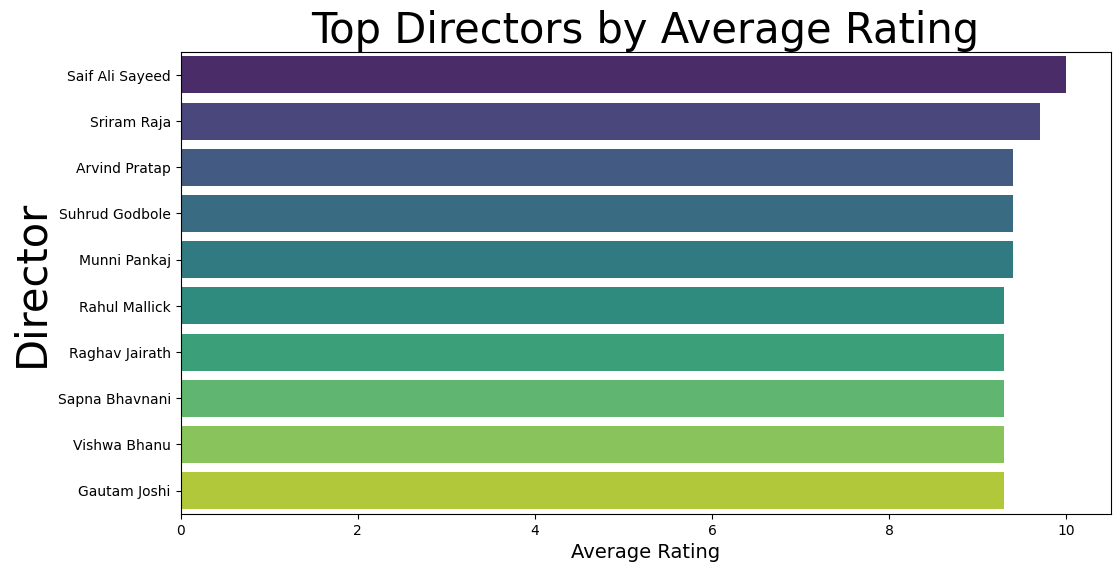

In [105]:
director_avg_rating = movie_data.groupby('Director')['Rating'].mean().reset_index()
top_directors = director_avg_rating.sort_values(by='Rating', ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(data=top_directors, x='Rating', y='Director', palette='viridis')
plt.title('Top Directors by Average Rating', fontsize=30)
plt.xlabel('Average Rating', fontsize=14)
plt.ylabel('Director', fontsize=30)
plt.show()

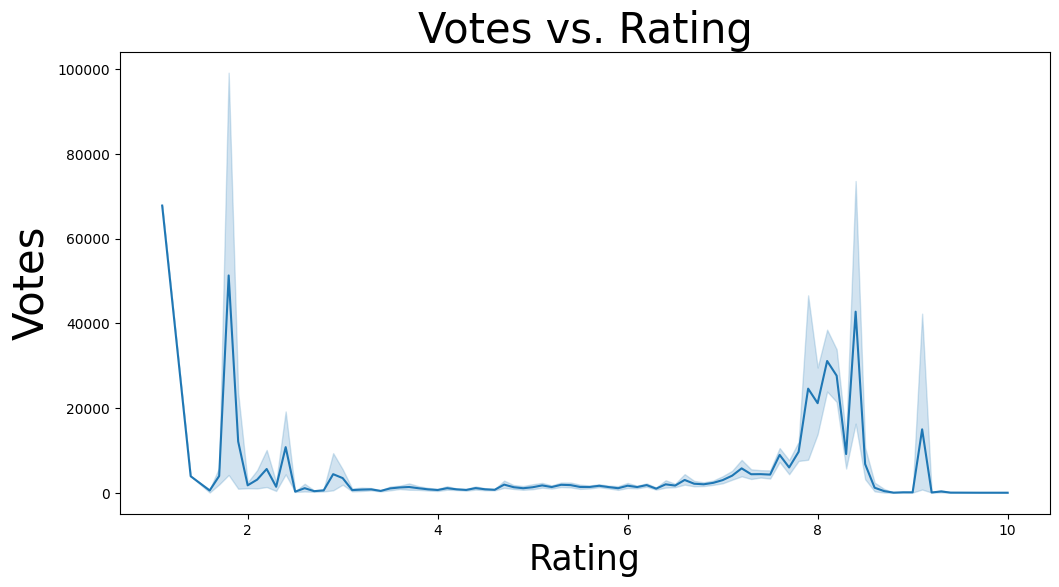

In [106]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=movie_data, x='Rating', y='Votes')
plt.title('Votes vs. Rating', fontsize=30)
plt.xlabel('Rating', fontsize=25)
plt.ylabel('Votes', fontsize=30)
plt.show()

In [107]:
import ipywidgets as widgets
from IPython.display import display


year_widget = widgets.IntText(description="Year")
votes_widget = widgets.IntText(description="Votes")
duration_widget = widgets.IntText(description="Duration (min)")


button = widgets.Button(description="Predict Rating")
output = widgets.Output()


def on_button_click(b):
    with output:
        output.clear_output() 
        
        year = year_widget.value
        votes = votes_widget.value
        duration = duration_widget.value
        
        
        input_data = pd.DataFrame([[year, votes, duration, movie_data['Genre_mean_rating'].mean(), movie_data['Director_encoded'].mean(), movie_data['Actor1_encoded'].mean(), movie_data['Actor2_encoded'].mean(), movie_data['Actor3_encoded'].mean()]], 
                                   columns=['Year', 'Votes', 'Duration', 'Genre_mean_rating', 'Director_encoded', 'Actor1_encoded', 'Actor2_encoded', 'Actor3_encoded'])
        predicted_rating = model.predict(input_data)
        print(f"Predicted Movie Rating: {predicted_rating[0]:.2f}")

button.on_click(on_button_click)

display(year_widget, votes_widget, duration_widget, button, output)


IntText(value=0, description='Year')

IntText(value=0, description='Votes')

IntText(value=0, description='Duration (min)')

Button(description='Predict Rating', style=ButtonStyle())

Output()

In [53]:
#TASK2_COMPLETED

In [ ]:
#THANKYOU!!!!